In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [20]:
import os

import numpy as np
import matplotlib.pyplot as plt

from dogo.results import get_scores_df

In [21]:
plt.rc('font', size=22)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [22]:
evaluation_datasets_lables = [
    ("H-D3RLPY-RT-0.1M-1-P0_10000", "D3RLPY 1: 0.1M"),
    ("H-D3RLPY-RT-0.2M-1-P0_10000", "D3RLPY 1: 0.2M"),
    ("H-D3RLPY-RT-0.4M-1-P0_10000", "D3RLPY 1: 0.4M"),
    ("H-D3RLPY-RT-0.6M-1-P0_10000", "D3RLPY 1: 0.6M"),
    ("H-D3RLPY-RT-0.8M-1-P0_10000", "D3RLPY 1: 0.8M"),
    ("H-D3RLPY-RT-1M-1-P0_10000", "D3RLPY 1: 1M"),
    ("H-D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2: 0.1M"),
    ("H-D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2: 0.2M"),
    ("H-D3RLPY-RT-0.4M-2-P0_10000", "D3RLPY 2: 0.4M"),
    ("H-D3RLPY-RT-0.6M-2-P0_10000", "D3RLPY 2: 0.6M"),
    ("H-D3RLPY-RT-0.8M-2-P0_10000", "D3RLPY 2: 0.8M"),
    ("H-D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2: 1M"),
    ("H-D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3: 0.1M"),
    ("H-D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3: 0.2M"),
    ("H-D3RLPY-RT-0.4M-3-P0_10000", "D3RLPY 3: 0.4M"),
    ("H-D3RLPY-RT-0.6M-3-P0_10000", "D3RLPY 3: 0.6M"),
    ("H-D3RLPY-RT-0.8M-3-P0_10000", "D3RLPY 3: 0.8M"),
    ("H-D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3: 1M"),
    ("H-SAC-RT-0.1M-1-P0_10000", "SL 1: 0.1M"),
    ("H-SAC-RT-0.2M-1-P0_10000", "SL 1: 0.2M"),
    ("H-SAC-RT-0.4M-1-P0_10000", "SL 1: 0.4M"),
    ("H-SAC-RT-0.6M-1-P0_10000", "SL 1: 0.6M"),
    ("H-SAC-RT-0.8M-1-P0_10000", "SL 1: 0.8M"),
    ("H-SAC-RT-1M-1-P0_10000", "SL 1: 1M"),
    ("H-SAC-RT-0.1M-2-P0_10000", "SL 2: 0.1M"),
    ("H-SAC-RT-0.2M-2-P0_10000", "SL 2: 0.2M"),
    ("H-SAC-RT-0.4M-2-P0_10000", "SL 2: 0.4M"),
    ("H-SAC-RT-0.6M-2-P0_10000", "SL 2: 0.6M"),
    ("H-SAC-RT-0.8M-2-P0_10000", "SL 2: 0.8M"),
    ("H-SAC-RT-1M-2-P0_10000", "SL 2: 1M"),
    ("H-SAC-RT-0.1M-3-P0_10000", "SL 3: 0.1M"),
    ("H-SAC-RT-0.2M-3-P0_10000", "SL 3: 0.2M"),
    ("H-SAC-RT-0.4M-3-P0_10000", "SL 3: 0.4M"),
    ("H-SAC-RT-0.6M-3-P0_10000", "SL 3: 0.6M"),
    ("H-SAC-RT-0.8M-3-P0_10000", "SL 3: 0.8M"),
    ("H-SAC-RT-1M-3-P0_10000", "SL 3: 1M"),
    ("D4RL-H-M_10000", "D4RL: M"),
    ("D4RL-H-ME_10000", "D4RL: ME"),
    ("D4RL-H-MR_10000", "D4RL: MR"),
    ("D4RL-H-R_10000", "D4RL: R"),
    ("H-RAND-1_10000", "Random 1"),
    ("H-RAND-2_10000", "Random 2"),
    ("H-RAND-3_10000", "Random 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

labels = ['No REx', 'REx: $\\beta=5.0$', 'REx: $\\beta=10.0$', 'REx: $\\beta=20.0$']

In [23]:
rt_1_training_datasets_labels = [
    ("H-RAND-2_10000", "Random Policy 2"),
    ("H-D3RLPY-RT-0.2M-1-P0_10000", "D3RLPY 1: 0.2M"),
    ("H-D3RLPY-RT-1M-1-P0_10000", "D3RLPY 1: 1M"),
    ("H-SAC-RT-0.2M-1-P0_10000", "SL 1: 0.2M"),
    ("H-SAC-RT-1M-1-P0_10000", "SL 1: 1M"),
]
rt_1_training_datasets = [i[0] for i in rt_1_training_datasets_labels]
rt_1_training_labels = [i[1] for i in rt_1_training_datasets_labels]

rt_1_experiments_no_rex = ['HO001', 'HO002', 'HO003']
rt_1_experiments_rex_5  = ['HO004', 'HO005', 'HO006']
rt_1_experiments_rex_10 = ['HO007', 'HO008', 'HO009']
rt_1_experiments_rex_20 = ['HO010', 'HO011', 'HO012']

rt_1_scores_no_rex_df = get_scores_df(rt_1_experiments_no_rex, evaluation_datasets)
rt_1_scores_rex_5_df = get_scores_df(rt_1_experiments_rex_5, evaluation_datasets)
rt_1_scores_rex_10_df = get_scores_df(rt_1_experiments_rex_10, evaluation_datasets)
rt_1_scores_rex_20_df = get_scores_df(rt_1_experiments_rex_20, evaluation_datasets)

rt_1_scores_no_rex_groups = (
    rt_1_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_1_scores_no_rex_avgs_df = rt_1_scores_no_rex_groups.mean().reset_index()
rt_1_scores_no_rex_mins_df = rt_1_scores_no_rex_groups.min().reset_index()
rt_1_scores_no_rex_maxs_df = rt_1_scores_no_rex_groups.max().reset_index()

rt_1_scores_rex_5_groups = (
    rt_1_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_1_scores_rex_5_avgs_df = rt_1_scores_rex_5_groups.mean().reset_index()
rt_1_scores_rex_5_mins_df = rt_1_scores_rex_5_groups.min().reset_index()
rt_1_scores_rex_5_maxs_df = rt_1_scores_rex_5_groups.max().reset_index()

rt_1_scores_rex_10_groups = (
    rt_1_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_1_scores_rex_10_avgs_df = rt_1_scores_rex_10_groups.mean().reset_index()
rt_1_scores_rex_10_mins_df = rt_1_scores_rex_10_groups.min().reset_index()
rt_1_scores_rex_10_maxs_df = rt_1_scores_rex_10_groups.max().reset_index()

rt_1_scores_rex_20_groups = (
    rt_1_scores_rex_20_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_1_scores_rex_20_avgs_df = rt_1_scores_rex_20_groups.mean().reset_index()
rt_1_scores_rex_20_mins_df = rt_1_scores_rex_20_groups.min().reset_index()
rt_1_scores_rex_20_maxs_df = rt_1_scores_rex_20_groups.max().reset_index()

rt_1_score_avgs_df = [
    rt_1_scores_no_rex_avgs_df,
    rt_1_scores_rex_5_avgs_df,
    rt_1_scores_rex_10_avgs_df,
    rt_1_scores_rex_20_avgs_df
]

In [24]:
rt_3_training_datasets_labels = [
    ("H-RAND-2_10000", "Random Policy 2"),
    ("H-RAND-3_10000", "Random Policy 3"),
    ("H-SAC-RT-0.1M-1-P0_10000", "SL 1: 0.1M"),
    ("H-D3RLPY-RT-0.1M-1-P0_10000", "D3RLPY 1: 0.1M"),
    ("H-D3RLPY-RT-0.2M-1-P0_10000", "D3RLPY 1: 0.2M"),
]
rt_3_training_datasets = [i[0] for i in rt_3_training_datasets_labels]
rt_3_training_labels = [i[1] for i in rt_3_training_datasets_labels]

rt_3_experiments_no_rex = ['HO013', 'HO014', 'HO015']
rt_3_experiments_rex_5  = ['HO016', 'HO017', 'HO018']
rt_3_experiments_rex_10 = ['HO019', 'HO020', 'HO021']
rt_3_experiments_rex_20 = ['HO022', 'HO023', 'HO024']

rt_3_scores_no_rex_df = get_scores_df(rt_3_experiments_no_rex, evaluation_datasets)
rt_3_scores_rex_5_df = get_scores_df(rt_3_experiments_rex_5, evaluation_datasets)
rt_3_scores_rex_10_df = get_scores_df(rt_3_experiments_rex_10, evaluation_datasets)
rt_3_scores_rex_20_df = get_scores_df(rt_3_experiments_rex_20, evaluation_datasets)

rt_3_scores_no_rex_groups = (
    rt_3_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_3_scores_no_rex_avgs_df = rt_3_scores_no_rex_groups.mean().reset_index()
rt_3_scores_no_rex_mins_df = rt_3_scores_no_rex_groups.min().reset_index()
rt_3_scores_no_rex_maxs_df = rt_3_scores_no_rex_groups.max().reset_index()

rt_3_scores_rex_5_groups = (
    rt_3_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_3_scores_rex_5_avgs_df = rt_3_scores_rex_5_groups.mean().reset_index()
rt_3_scores_rex_5_mins_df = rt_3_scores_rex_5_groups.min().reset_index()
rt_3_scores_rex_5_maxs_df = rt_3_scores_rex_5_groups.max().reset_index()

rt_3_scores_rex_10_groups = (
    rt_3_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_3_scores_rex_10_avgs_df = rt_3_scores_rex_10_groups.mean().reset_index()
rt_3_scores_rex_10_mins_df = rt_3_scores_rex_10_groups.min().reset_index()
rt_3_scores_rex_10_maxs_df = rt_3_scores_rex_10_groups.max().reset_index()

rt_3_scores_rex_20_groups = (
    rt_3_scores_rex_20_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_3_scores_rex_20_avgs_df = rt_3_scores_rex_20_groups.mean().reset_index()
rt_3_scores_rex_20_mins_df = rt_3_scores_rex_20_groups.min().reset_index()
rt_3_scores_rex_20_maxs_df = rt_3_scores_rex_20_groups.max().reset_index()

rt_3_score_avgs_df = [
    rt_3_scores_no_rex_avgs_df,
    rt_3_scores_rex_5_avgs_df,
    rt_3_scores_rex_10_avgs_df,
    rt_3_scores_rex_20_avgs_df
]

In [25]:
rt_4_training_datasets_labels = [
    ("H-SAC-RT-0.6M-1-P0_10000", "SL 1: 0.6M"),
    ("H-SAC-RT-0.8M-1-P0_10000", "SL 1: 0.8M"),
    ("H-SAC-RT-1M-1-P0_10000", "SL 1: 1M"),
    ("H-D3RLPY-RT-0.8M-1-P0_10000", "D3RLPY 1: 0.8M"),
    ("H-D3RLPY-RT-1M-1-P0_10000", "D3RLPY 1: 1M"),
]
rt_4_training_datasets = [i[0] for i in rt_4_training_datasets_labels]
rt_4_training_labels = [i[1] for i in rt_4_training_datasets_labels]

rt_4_experiments_no_rex = ['HO025', 'HO026', 'HO027']
rt_4_experiments_rex_5  = ['HO028', 'HO029', 'HO030']
rt_4_experiments_rex_10 = ['HO031', 'HO032', 'HO033']
rt_4_experiments_rex_20 = ['HO034', 'HO035', 'HO036']

rt_4_scores_no_rex_df = get_scores_df(rt_4_experiments_no_rex, evaluation_datasets)
rt_4_scores_rex_5_df = get_scores_df(rt_4_experiments_rex_5, evaluation_datasets)
rt_4_scores_rex_10_df = get_scores_df(rt_4_experiments_rex_10, evaluation_datasets)
rt_4_scores_rex_20_df = get_scores_df(rt_4_experiments_rex_20, evaluation_datasets)

rt_4_scores_no_rex_groups = (
    rt_4_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_4_scores_no_rex_avgs_df = rt_4_scores_no_rex_groups.mean().reset_index()
rt_4_scores_no_rex_mins_df = rt_4_scores_no_rex_groups.min().reset_index()
rt_4_scores_no_rex_maxs_df = rt_4_scores_no_rex_groups.max().reset_index()

rt_4_scores_rex_5_groups = (
    rt_4_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_4_scores_rex_5_avgs_df = rt_4_scores_rex_5_groups.mean().reset_index()
rt_4_scores_rex_5_mins_df = rt_4_scores_rex_5_groups.min().reset_index()
rt_4_scores_rex_5_maxs_df = rt_4_scores_rex_5_groups.max().reset_index()

rt_4_scores_rex_10_groups = (
    rt_4_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_4_scores_rex_10_avgs_df = rt_4_scores_rex_10_groups.mean().reset_index()
rt_4_scores_rex_10_mins_df = rt_4_scores_rex_10_groups.min().reset_index()
rt_4_scores_rex_10_maxs_df = rt_4_scores_rex_10_groups.max().reset_index()

rt_4_scores_rex_20_groups = (
    rt_4_scores_rex_20_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_4_scores_rex_20_avgs_df = rt_4_scores_rex_20_groups.mean().reset_index()
rt_4_scores_rex_20_mins_df = rt_4_scores_rex_20_groups.min().reset_index()
rt_4_scores_rex_20_maxs_df = rt_4_scores_rex_20_groups.max().reset_index()

rt_4_score_avgs_df = [
    rt_4_scores_no_rex_avgs_df,
    rt_4_scores_rex_5_avgs_df,
    rt_4_scores_rex_10_avgs_df,
    rt_4_scores_rex_20_avgs_df
]

In [26]:
rt_5_training_datasets_labels = [
    ("H-RAND-2_10000", "Random Policy 2"),
    ("H-SAC-RT-0.1M-1-P0_10000", "SL 1: 0.1M"),
    ("H-SAC-RT-0.2M-1-P0_10000", "SL 1: 0.2M"),
    ("H-D3RLPY-RT-0.1M-1-P0_10000", "D3RLPY 1: 0.1M"),
    ("H-D3RLPY-RT-0.2M-1-P0_10000", "D3RLPY 1: 0.2M"),
]
rt_5_training_datasets = [i[0] for i in rt_5_training_datasets_labels]
rt_5_training_labels = [i[1] for i in rt_5_training_datasets_labels]

rt_5_experiments_no_rex = ['HO145', 'HO146', 'HO147']
rt_5_experiments_rex_5  = ['HO148', 'HO149', 'HO150']
rt_5_experiments_rex_10 = ['HO151', 'HO152', 'HO153']
rt_5_experiments_rex_20 = ['HO154', 'HO155', 'HO156']

rt_5_scores_no_rex_df = get_scores_df(rt_5_experiments_no_rex, evaluation_datasets)
rt_5_scores_rex_5_df = get_scores_df(rt_5_experiments_rex_5, evaluation_datasets)
rt_5_scores_rex_10_df = get_scores_df(rt_5_experiments_rex_10, evaluation_datasets)
rt_5_scores_rex_20_df = get_scores_df(rt_5_experiments_rex_20, evaluation_datasets)

rt_5_scores_no_rex_groups = (
    rt_5_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_5_scores_no_rex_avgs_df = rt_5_scores_no_rex_groups.mean().reset_index()
rt_5_scores_no_rex_mins_df = rt_5_scores_no_rex_groups.min().reset_index()
rt_5_scores_no_rex_maxs_df = rt_5_scores_no_rex_groups.max().reset_index()

rt_5_scores_rex_5_groups = (
    rt_5_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_5_scores_rex_5_avgs_df = rt_5_scores_rex_5_groups.mean().reset_index()
rt_5_scores_rex_5_mins_df = rt_5_scores_rex_5_groups.min().reset_index()
rt_5_scores_rex_5_maxs_df = rt_5_scores_rex_5_groups.max().reset_index()

rt_5_scores_rex_10_groups = (
    rt_5_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_5_scores_rex_10_avgs_df = rt_5_scores_rex_10_groups.mean().reset_index()
rt_5_scores_rex_10_mins_df = rt_5_scores_rex_10_groups.min().reset_index()
rt_5_scores_rex_10_maxs_df = rt_5_scores_rex_10_groups.max().reset_index()

rt_5_scores_rex_20_groups = (
    rt_5_scores_rex_20_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_5_scores_rex_20_avgs_df = rt_5_scores_rex_20_groups.mean().reset_index()
rt_5_scores_rex_20_mins_df = rt_5_scores_rex_20_groups.min().reset_index()
rt_5_scores_rex_20_maxs_df = rt_5_scores_rex_20_groups.max().reset_index()

rt_5_score_avgs_df = [
    rt_5_scores_no_rex_avgs_df,
    rt_5_scores_rex_5_avgs_df,
    rt_5_scores_rex_10_avgs_df,
    rt_5_scores_rex_20_avgs_df
]

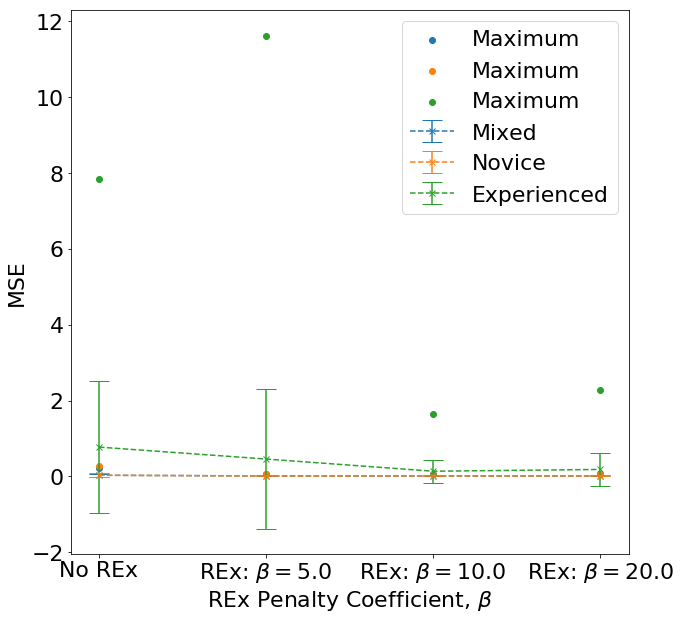

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'Mixed'),
    # (rt_3_training_datasets, rt_3_score_avgs_df, 'Novice'),
    (rt_5_training_datasets, rt_5_score_avgs_df, 'Novice'),
    (rt_4_training_datasets, rt_4_score_avgs_df, 'Experienced'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_maxs = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].std(ddof=0))
        test_maxs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].max())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_maxs, marker='o', color=cols[i], label='Maximum')
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('MSE')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

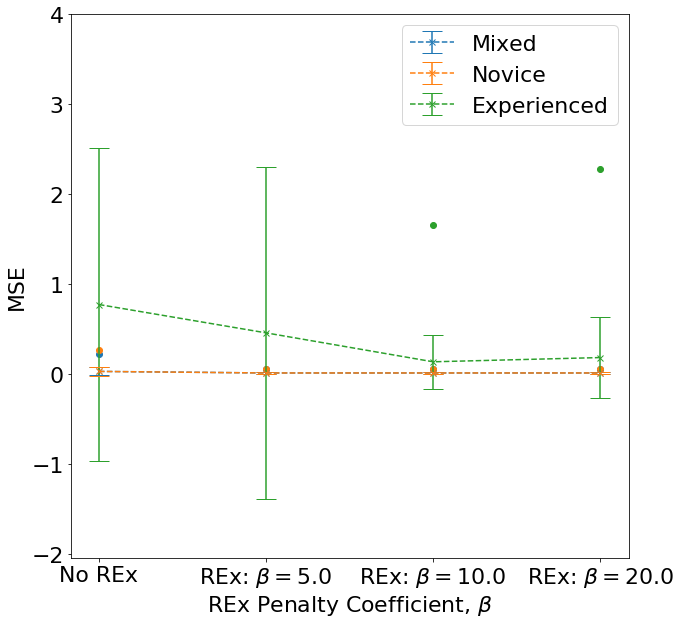

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'Mixed'),
    # (rt_3_training_datasets, rt_3_score_avgs_df, 'Novice'),
    (rt_5_training_datasets, rt_5_score_avgs_df, 'Novice'),
    (rt_4_training_datasets, rt_4_score_avgs_df, 'Experienced'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_maxs = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].std(ddof=0))
        test_maxs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].max())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_maxs, marker='o', color=cols[i])
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('MSE')
ax.set_ylim(None, 4)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

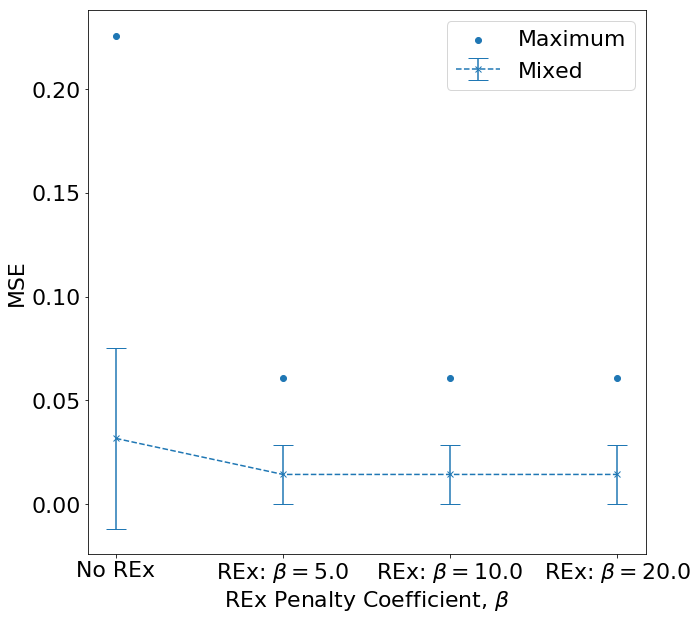

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'Mixed'),
    # (rt_3_training_datasets, rt_3_score_avgs_df, 'Novice'),
    # (rt_5_training_datasets, rt_5_score_avgs_df, 'Novice'),
    # (rt_4_training_datasets, rt_4_score_avgs_df, 'Experienced'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_maxs = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].std(ddof=0))
        test_maxs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].max())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_maxs, marker='o', color=cols[i], label='Maximum')
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('MSE')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

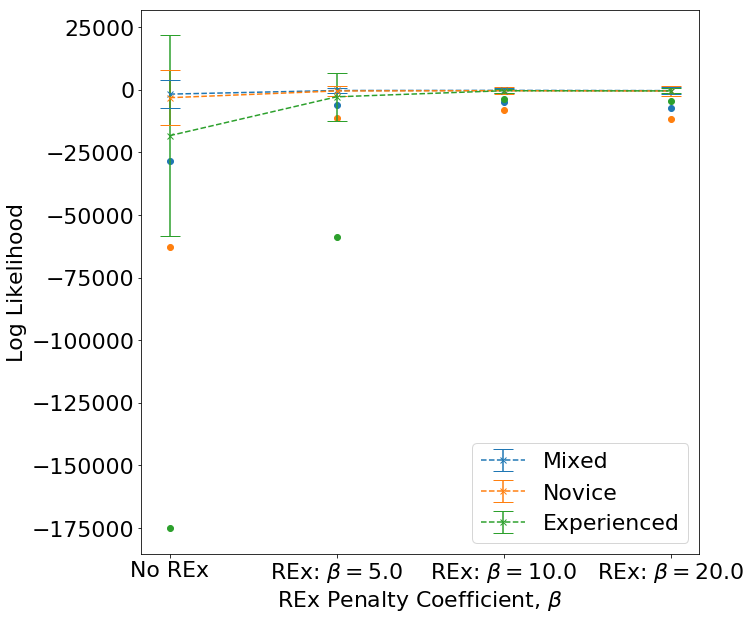

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'Mixed'),
    # (rt_3_training_datasets, rt_3_score_avgs_df, 'Novice'),
    (rt_5_training_datasets, rt_5_score_avgs_df, 'Novice'),
    (rt_4_training_datasets, rt_4_score_avgs_df, 'Experienced'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_mins = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].std(ddof=0))
        test_mins.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].min())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_mins, marker='o', color=cols[i])
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

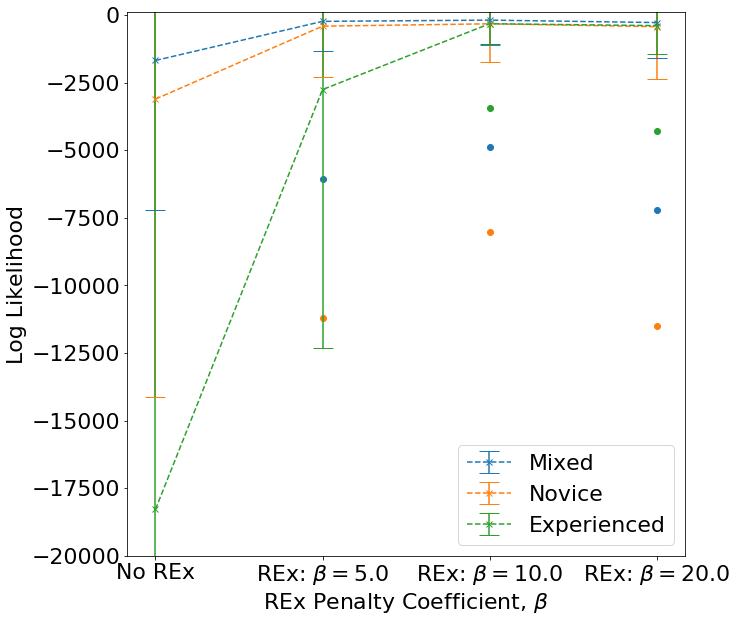

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'Mixed'),
    # (rt_3_training_datasets, rt_3_score_avgs_df, 'Novice'),
    (rt_5_training_datasets, rt_5_score_avgs_df, 'Novice'),
    (rt_4_training_datasets, rt_4_score_avgs_df, 'Experienced'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_mins = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].std(ddof=0))
        test_mins.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].min())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_mins, marker='o', color=cols[i])
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(-20000, 100)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

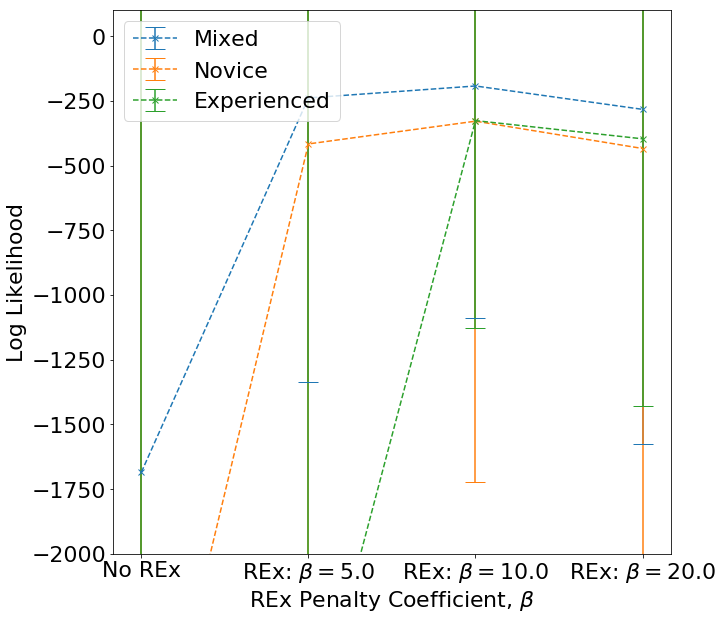

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'Mixed'),
    # (rt_3_training_datasets, rt_3_score_avgs_df, 'Novice'),
    (rt_5_training_datasets, rt_5_score_avgs_df, 'Novice'),
    (rt_4_training_datasets, rt_4_score_avgs_df, 'Experienced'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_mins = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].std(ddof=0))
        test_mins.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].min())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_mins, marker='o', color=cols[i])
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(-2000, 100)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

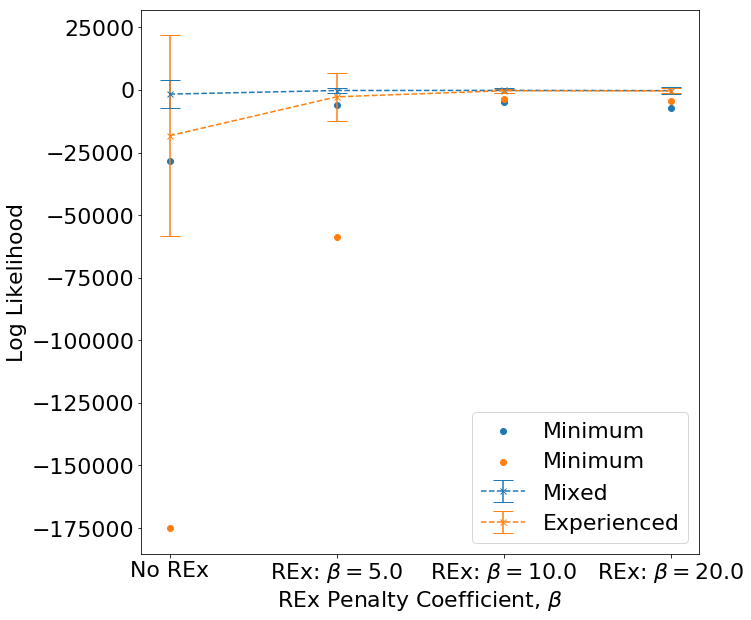

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'Mixed'),
    # (rt_3_training_datasets, rt_3_score_avgs_df, 'Novice'),
    # (rt_5_training_datasets, rt_5_score_avgs_df, 'Novice'),
    (rt_4_training_datasets, rt_4_score_avgs_df, 'Experienced'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_mins = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].std(ddof=0))
        test_mins.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].min())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_mins, marker='o', color=cols[i], label='Minimum')
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

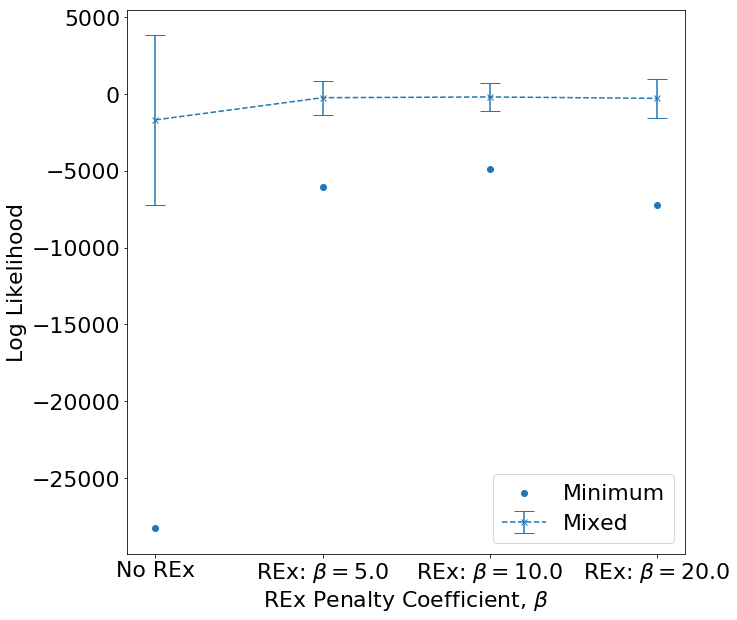

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'Mixed'),
    # (rt_3_training_datasets, rt_3_score_avgs_df, 'Novice'),
    # (rt_5_training_datasets, rt_5_score_avgs_df, 'Novice'),
    # (rt_4_training_datasets, rt_4_score_avgs_df, 'Experienced'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_mins = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].std(ddof=0))
        test_mins.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].min())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_mins, marker='o', color=cols[i], label='Minimum')
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)